<a href="https://colab.research.google.com/github/ChintaLokesh/Deep_Learning_Neural_Network/blob/master/Fashion_MNIST_NN_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
category={0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
np.random.choice((np.where(y_train == 0)[0]),5)

array([20795, 31611, 38158, 55006, 41255])

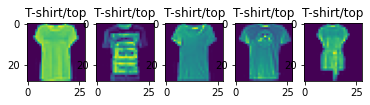

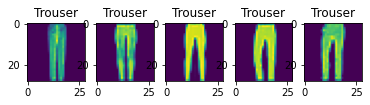

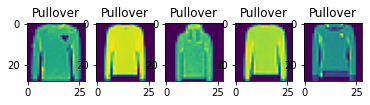

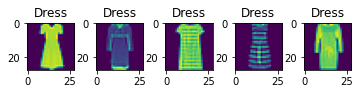

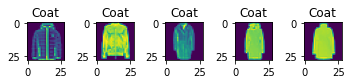

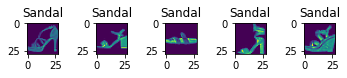

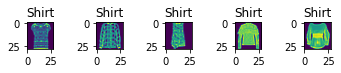

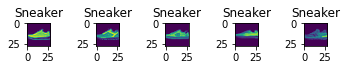

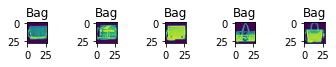

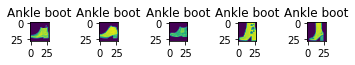

In [9]:
for cat in range(10):
  index=np.random.choice((np.where(y_train == cat)[0]),5)
  for col in range(5):
    plt.subplot(cat+1,5,col+1)
    plt.imshow(x_train[index[col]])
    plt.title(category[cat])
  plt.show()

In [10]:
x_train = x_train / 255.0
y_train = tf.keras.utils.to_categorical(y_train)

In [11]:
model=tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Input((28,28),name="Input"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation=tf.keras.activations.relu,name="Hidden_layer"))
model.add(tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax,name="output_layer"))

In [13]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,metrics=["acc"],optimizer=tf.keras.optimizers.SGD())

In [14]:
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.7820 - acc: 0.7511 - val_loss: 0.5741 - val_acc: 0.8038
Epoch 2/5
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5305 - acc: 0.8204 - val_loss: 0.5076 - val_acc: 0.8188
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4817 - acc: 0.8368 - val_loss: 0.4619 - val_acc: 0.8340
Epoch 4/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4549 - acc: 0.8425 - val_loss: 0.4493 - val_acc: 0.8397
Epoch 5/5
1688/1688 [==============================] - 3s 2ms/step - loss: 0.4356 - acc: 0.8491 - val_loss: 0.4820 - val_acc: 0.8253


In [15]:
x_test = x_test / 255.0
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
# model_history = model.fit(x_train, y_train, epochs=5, 
#                           validation_split=0.1, batch_size=32, callbacks=[pwp])

In [36]:
for keys,values in category.items():
  if(keys ==0):
    print(values)

T-shirt/top


In [37]:
def predict (num):
  print(f"Actual label is {y_test[num]}")
  plt.imshow(x_test[num])
  image=x_test[num]
  image=np.expand_dims(image,axis=0)
  result=model.predict(image)
  print(f"model predicted {np.argmax(result)} with accuracy {np.round(result.max()*100,2)}")

Actual label is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 77ms/step
model predicted 1 with accuracy 99.89


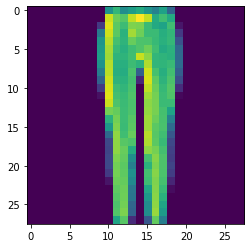

In [38]:
predict(345)